<a href="https://colab.research.google.com/github/dbace23/hacktiv8/blob/main/h8dsft_Descriptive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t as t_func
from scipy.stats import norm
from scipy.stats import kurtosis

In [47]:
df = pd.read_csv("covid.csv")
df.head(5)

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,39,-20,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,100.00%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,39,-18,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,95.12%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,0,2,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,39,-16,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,90.70%,1.0,1.0


In [48]:
df_filt = df[["Total Cases", "Total Deaths","Total Recovered"]].copy()
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20816 entries, 0 to 20815
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total Cases      20816 non-null  int64
 1   Total Deaths     20816 non-null  int64
 2   Total Recovered  20816 non-null  int64
dtypes: int64(3)
memory usage: 488.0 KB


# Measure of Central Tendency and Variance

In [49]:
df_filt.describe()

,Total Cases,Total Deaths,Total Recovered
count,2.081600e+04,20816.000000,2.081600e+04
mean,7.788760e+04,2388.498463,6.935489e+04
std,3.417859e+05,10758.160910,3.124817e+05
min,1.000000e+00,0.000000,0.000000e+00
25%,1.579500e+03,43.000000,8.730000e+02
50%,9.827000e+03,253.000000,7.739000e+03
75%,3.363625e+04,949.000000,2.918100e+04
max,4.247320e+06,143519.000000,4.092586e+06


Calculate variance and standard deviation for all the numeric columns

In [50]:
#standard deviation
print("Numeric columns Standard Deviation")
print(df_filt.std())
print("")
print("Numeric columns Variance")
print(df_filt.var())
print("")
#Range
num_columns = df_filt.describe().columns
print("range")
print(df_filt[num_columns].max()-df_filt[num_columns].min())

Numeric columns Standard Deviation
Total Cases        341785.896278
Total Deaths        10758.160910
Total Recovered    312481.665276
dtype: float64

Numeric columns Variance
Total Cases        1.168176e+11
Total Deaths       1.157380e+08
Total Recovered    9.764479e+10
dtype: float64

range
Total Cases        4247319
Total Deaths        143519
Total Recovered    4092586
dtype: int64


In [51]:
df_filt.mode()

,Total Cases,Total Deaths,Total Recovered
0,2,1,0


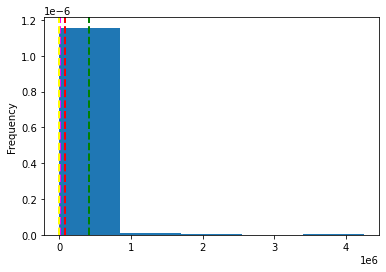

In [52]:
df_filt['Total Cases'].plot.hist(bins=5,density=True)
plt.axvline(df_filt['Total Cases'].describe()['mean'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_filt['Total Cases'].describe()['50%'], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_filt['Total Cases'].describe()['mean']+df_filt['Total Cases'].describe()['std']
            , color='green', linestyle='dashed', linewidth=2)
plt.axvline(df_filt['Total Cases'].mode()[0], color='yellow', linestyle='dashed', linewidth=2)